## Regression Project
* I explore data analysis packages in Python
* I construct matplotlib graphs
* I use seaborn for built-in data sets and handy plotting features
* I use statsmodels for linear regression
* Functions I made
  - **rsqdiv** segments data to see if smaller chunks have better correlation
  - **colorroll** generates random colors from matplotlib colormaps

In [642]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [643]:
import statsmodels.api as sm

In [644]:
df_f = sns.load_dataset("flights")

In [645]:
df_f.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### statsmodels

In [646]:
X = np.arange(len(df_f))
Y = df_f['passengers']
X = sm.add_constant(X)

In [647]:
model = sm.OLS(Y, X)

In [648]:
res = model.fit()

In [649]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             passengers   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     828.2
Date:                Tue, 17 Mar 2020   Prob (F-statistic):           4.02e-61
Time:                        16:32:21   Log-Likelihood:                -754.82
No. Observations:                 144   AIC:                             1514.
Df Residuals:                     142   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.3100      7.636     11.826      0.0

### colorroll randomizer

In [650]:
from matplotlib import cm
def colorroll(cname):
    palette = cm.get_cmap(cname)
    r1 = np.random.random()
    r2 = np.random.random()
    c1 = palette(r1)
    c2 = palette(r2)
    return (c1, c2)

### Regression plot setup

In [651]:
x = np.arange(len(df_f))
y = df_f['passengers']
b, m = res.params
line = m * x + b

In [652]:
locs = []
yrs = df_f['year']
for i in range(1, len(yrs)):
    if yrs[i] != yrs[i-1]:
        locs.append(i)


### colorroll in action

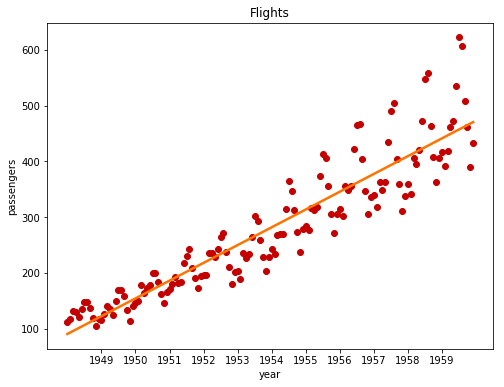

In [653]:
c1, c2 = colorroll('jet')
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.scatter(x, y, marker='o', color = c1)
ax.plot(x, line, color=c2, linewidth=2.5)
ax.set_title('Flights')
ax.set_ylabel('passengers')
ax.set_xlabel('year')
ax.set_xticks(locs)
ax.set_xticklabels(yrs.unique())
plt.show()

### Linear regression in seaborn

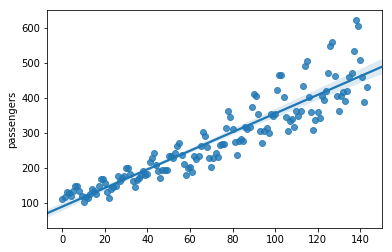

In [654]:
sns.regplot(np.arange(len(df_f)), y=df_f["passengers"])

### rsqdiv 

In [655]:
def rsqdiv(x, y, divvy=1, min_samples=20):
    # Sort data first so lines are not jumbled
    df = pd.DataFrame({'col1': x, 'col2': y})
    df = df.sort_values(by='col1', ascending=True)
    x = df['col1']
    y = df['col2']
    # Scatter plot
    fig, ax = plt.subplots(1,1, figsize=(8, 6))
    ax.scatter(x, y, marker='+', color='blue')
    # Set min. number of data points
    divvy = divvy if (len(x) // divvy >= min_samples) else (len(x) // min_samples)
    print(f'Regression Split {divvy}')
    # Divide data and plot
    for i in range(divvy):
        inc = len(x) // divvy
        left = i * inc
        right = (i+1) * inc 
        X = x[left:right]
        Y = y[left:right]
        X = sm.add_constant(X)
        model = sm.OLS(Y, X)
        results = model.fit()
        b, m = results.params
        dom = x[left:right]
        line = m*dom + b
        ax.plot(dom, line, color='red')
        report = f'[{left},{right}] -> '
        report += f'R^2 = {results.rsquared:.3}'
        print(report)
    plt.show()
    # returns printout of R^2 correlation and a plot

Regression Split 3
[0,48] -> R^2 = 0.681
[48,96] -> R^2 = 0.529
[96,144] -> R^2 = 0.31


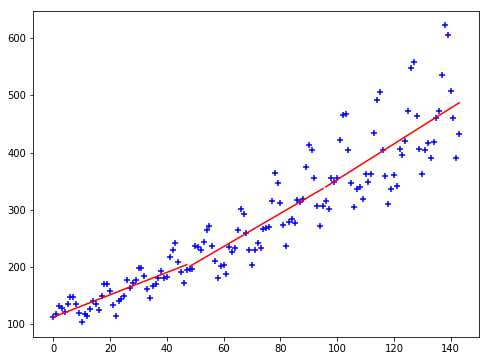

In [656]:
rsqdiv(np.arange(len(df_f)), df_f['passengers'], 3, min_samples=20)

The 'flights' dataset has a linear increase in airline customers over 144 months beginning in 1949.   
The approximate rate is +2.66 customers/month.

In [657]:
# Regression prediction
print(36 * 2.66 + 90)
print(72 * 2.66 + 90)
print(round(108 * 2.66 + 90, 2))

185.76
281.52
377.28


In [658]:
# Actual
print(df_f['passengers'][36])
print(df_f['passengers'][72])
print(df_f['passengers'][108])

171
242
340


rsqdiv worsens overral correlation here.  
rsqdiv does reveal that earlier data is more linear than later data.  
Interesting note is that the business has seasonality.

In [659]:
seasonal = df_f[['month', 'passengers']].groupby(['month']).sum()

In [660]:
topflights = seasonal.sort_values(by='passengers', ascending=False)

In [661]:
# Busiest months for airline 1949-1960
topflights[:3]

,passengers
month,
July,4216
August,4213
June,3740


In [662]:
# Slowest months for airline 1949-1960
topflights[-3:]

,passengers
month,
January,2901
February,2820
November,2794


### Testing rsqdiv on other seaborn datasets

In [663]:
df_t = sns.load_dataset('tips')

In [664]:
df_t.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


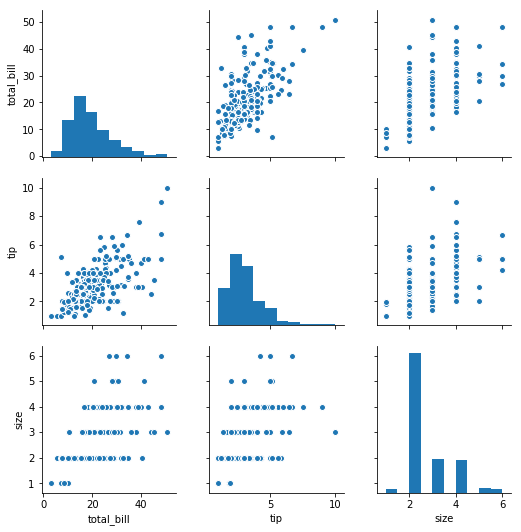

In [665]:
sns.pairplot(df_t)

Regression Split 2
[0,122] -> R^2 = 0.228
[122,244] -> R^2 = 0.254


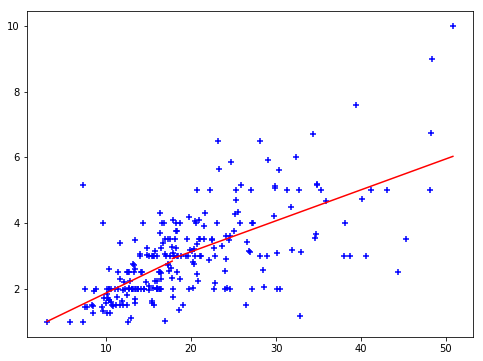

In [666]:
rsqdiv(x=df_t['total_bill'], y=df_t['tip'], divvy=2)

Regression Split 1
[0,244] -> R^2 = 0.457


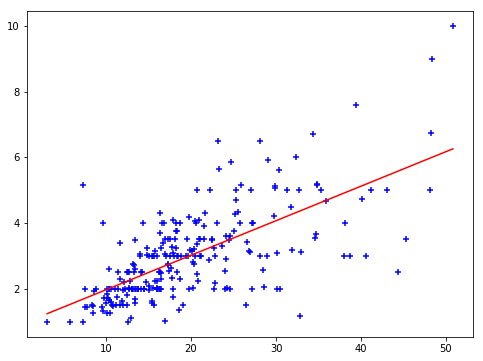

In [667]:
rsqdiv(x=df_t['total_bill'], y=df_t['tip'], divvy=1)

In [668]:
df_c = sns.load_dataset('car_crashes')

In [669]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
total             51 non-null float64
speeding          51 non-null float64
alcohol           51 non-null float64
not_distracted    51 non-null float64
no_previous       51 non-null float64
ins_premium       51 non-null float64
ins_losses        51 non-null float64
abbrev            51 non-null object
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [670]:
df_c.head(3)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ


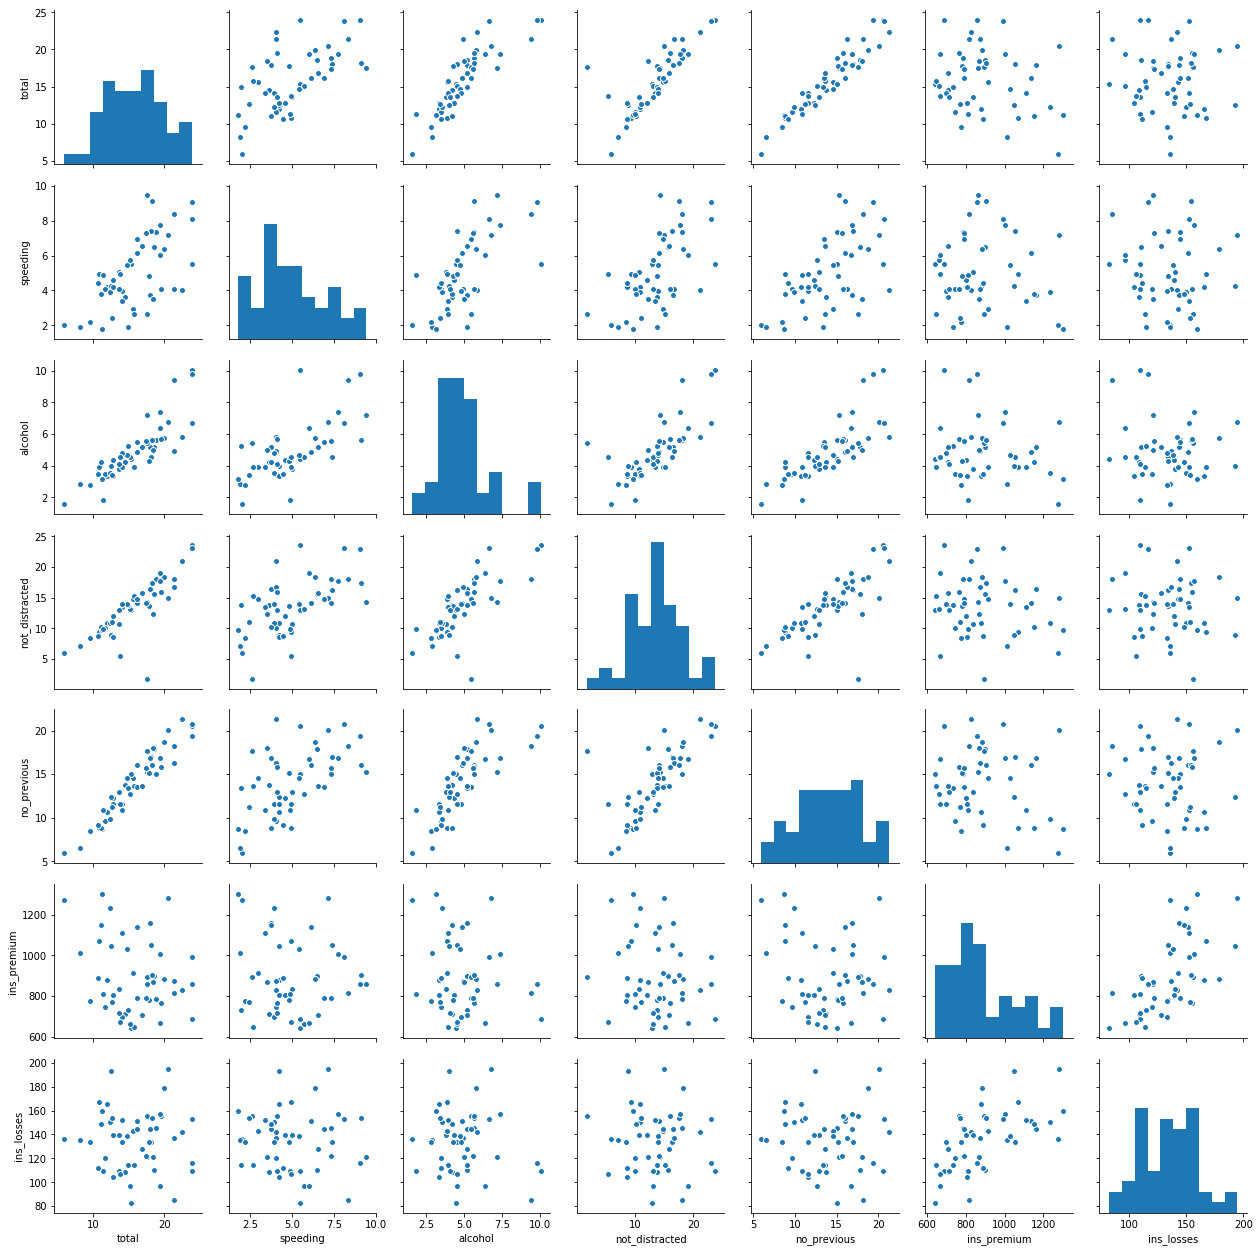

In [671]:
sns.pairplot(df_c)

Regression Split 2
[0,25] -> R^2 = 0.579
[25,50] -> R^2 = 0.425


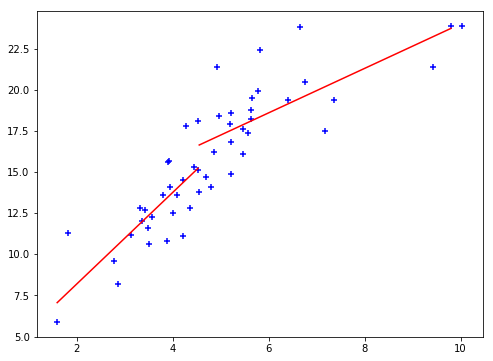

In [672]:
rsqdiv(x=df_c['alcohol'], y=df_c['total'], divvy=2, min_samples=10)

Regression Split 1
[0,51] -> R^2 = 0.727


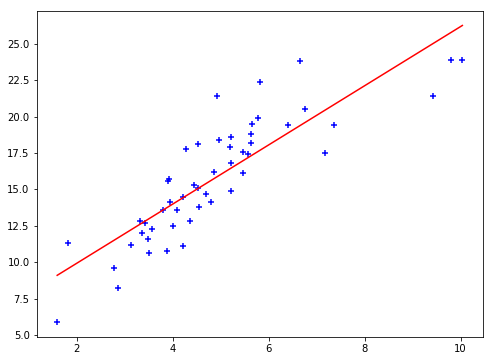

In [673]:
rsqdiv(x=df_c['alcohol'], y=df_c['total'], divvy=1, min_samples=10)

In [674]:
lessalc = df_c[df_c['alcohol'] < 7]

Regression Split 2
[0,23] -> R^2 = 0.537
[23,46] -> R^2 = 0.488


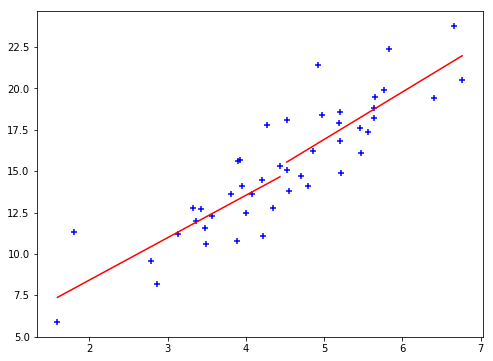

In [675]:
rsqdiv(x=lessalc['alcohol'], y=lessalc['total'], divvy=2)

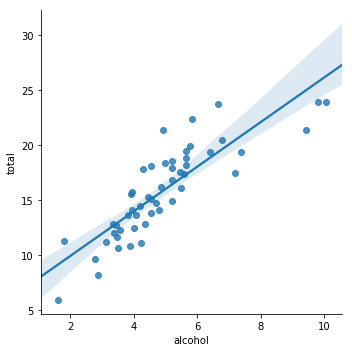

In [676]:
sns.lmplot(x='alcohol', y='total', data=df_c)

## Conclusions
* Project data was somewhat linear but quite messy. 
* seaborn is useful for quick data visualizations.
* rsqdiv performed best on 'flights' dataset, but other wise was not super useful. 
* rsqdiv is possibly useful for sales trends. 
* Correlation improves with more values, so larger datasets would be better.
* matplotlib is great for customization. 